In [21]:
# Importations 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# SKLEARN

#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Récupérer le dataframe pour entraîner le modèle

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print('Les colonnes sont : ', df_train.columns)

Les colonnes sont :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


survival	// Survival	: 0 = No, 1 = Yes <br>
pclass	// Ticket class	: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex //	Sex	<br>
Age	//Age in years	<br>
sibsp	// # of siblings / spouses aboard the Titanic	<br>
parch	// # of parents / children aboard the Titanic	<br>
ticket	// Ticket number	<br>
fare	// Passenger fare	<br>
cabin	// Cabin number	<br>
embarked	// Port of Embarkation <br>

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


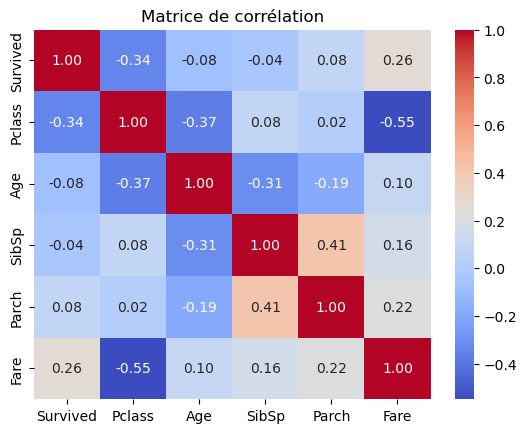

In [19]:
sub_df = df_train.drop( [ "PassengerId" , "Name" ] , axis=1 )
correlation_matrix = sub_df.corr()

# Créer la carte de chaleur avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Ajouter un titre
plt.title('Matrice de corrélation')

# Afficher la carte de chaleur
plt.show()

In [36]:
features = ['Pclass', 'Sex', 'SibSp','Parch']

X = pd.get_dummies(df_train[features])
y = df_train['Survived']

X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
prediction = model.predict(X_test)